In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticsRegression
#from sklearn.linear_model import SGDClasifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
#set the data to columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

#Since the data has already splitted into test and train data, now we will join them together
#We are going to process the data into dataset
dataset1 = pd.read_csv("adult.data", names = cols, index_col = False, na_values = [' ?'])
dataset2 = pd.read_csv("adult.test", names = cols, index_col = False, na_values = [' ?'])
dataset = dataset1.append(dataset2)

#Work on removing the whitespace
dataset_object = dataset.select_dtypes(['object'])
dataset[dataset_object.columns] = dataset_object.apply(lambda a: a.str.strip())

In [3]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [5]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


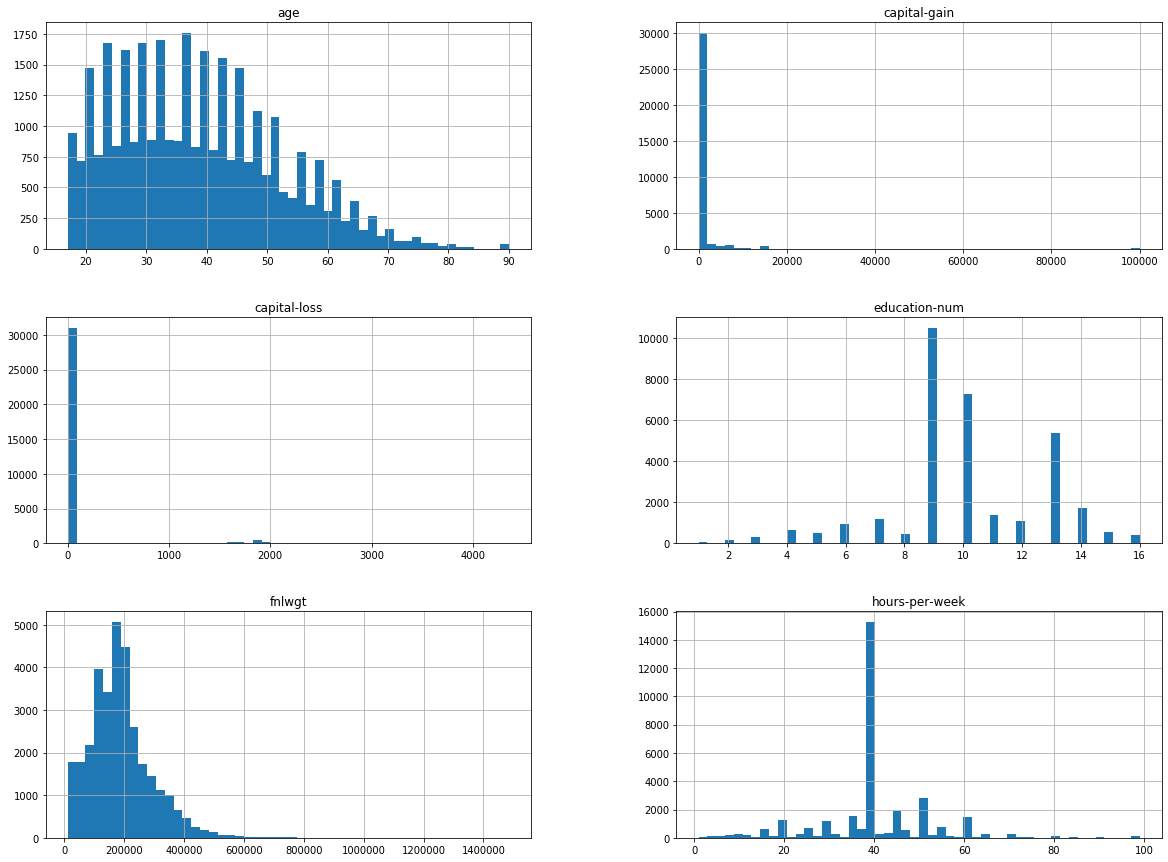

In [6]:
dataset1.hist(bins = 50, figsize = (20, 15))
plt.show()

In [7]:
dataset.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

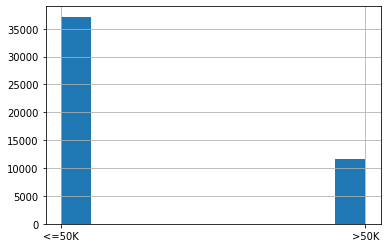

In [8]:
dataset.income.hist()
plt.show()

In [9]:
#analysing categorical data
category_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for cols in category_cols:
    print(dataset1[cols].value_counts(), '\n')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-cleri

In [10]:
#processing the correlation matrix 
dataset_corr = dataset.corr()
dataset_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [11]:
dataset_corr['hours-per-week'].sort_values(ascending=False)

hours-per-week    1.000000
education-num     0.143689
capital-gain      0.082157
age               0.071558
capital-loss      0.054467
fnlwgt           -0.013519
Name: hours-per-week, dtype: float64

In [12]:
from pandas.plotting import scatter_matrix
selected_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

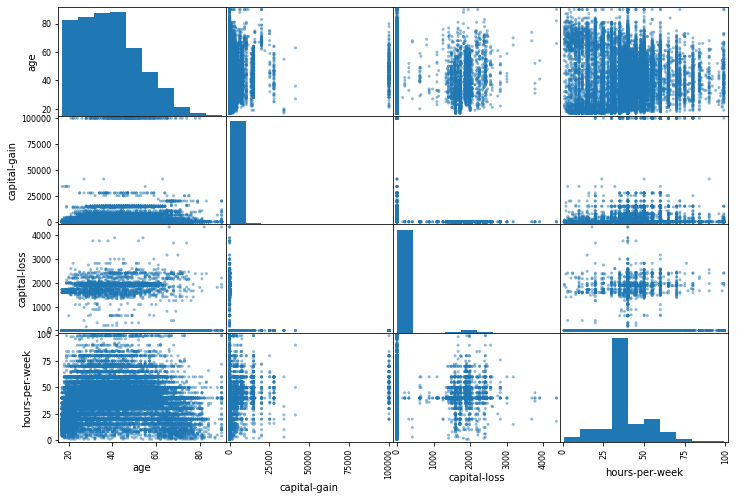

In [13]:
scatter_matrix(dataset[selected_cols], figsize=(12, 8))
plt.show()

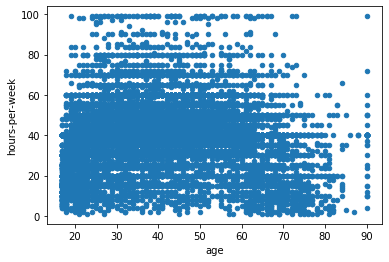

In [14]:
dataset1.plot (x = 'age', y = 'hours-per-week', kind = 'scatter')
plt.show()

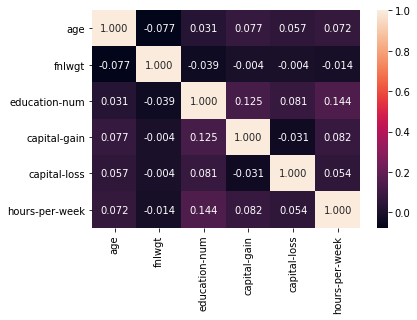

In [15]:
sns.heatmap(dataset.corr(), annot = True, fmt = ".3f")

In [16]:
x = dataset.drop('income', axis = 1)
y = dataset['income']

print('Shape of original dataset: ', dataset. shape)
print('Shape of x: ', x.shape, 'Type = ', type(x))
print('Shape of y: ', y.shape, 'Type = ', type(y))

Shape of original dataset:  (48842, 15)
Shape of x:  (48842, 14) Type =  <class 'pandas.core.frame.DataFrame'>
Shape of y:  (48842,) Type =  <class 'pandas.core.series.Series'>


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

print('Shape of x_train: ', x_train.shape, 'y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape, 'y_test: ', y_test.shape)

Shape of x_train:  (39073, 14) y_train:  (39073,)
Shape of x_test:  (9769, 14) y_test:  (9769,)


In [18]:
category_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
x_train_num = x_train.drop(category_col, axis = 1)
x_train_category = x_train[category_col]

print('Shape of x_train_num: ', x_train_num.shape)
print('Shape of x_train_category: ', x_train_category.shape)

Shape of x_train_num:  (39073, 6)
Shape of x_train_category:  (39073, 8)


In [19]:
#normalization
scaler = StandardScaler() 
x_train_num_tr = scaler.fit_transform(x_train_num)

print('>>> Mean of all columns:\n', x_train_num_tr.mean(axis=0))
print('\n>>> Std of all columns:\n', x_train_num_tr.std(axis=0))

>>> Mean of all columns:
 [ 1.86214460e-16 -4.45532645e-17 -7.63770248e-17  1.64574303e-17
 -8.80154286e-17  6.38293707e-17]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1.]


In [20]:
print('Number of missing values for all columns:')
x_train_num.isnull().sum()

Number of missing values for all columns:


age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [21]:
print('Number of missing values for all columns:')
x_train_category.isnull().sum()

Number of missing values for all columns:


workclass         2222
education            0
marital-status       0
occupation        2231
relationship         0
race                 0
sex                  0
native-country     677
dtype: int64

In [22]:
#data preprocessing
print('Percentage of missing value for workplace: {:.3f}%'.format(dataset1['workclass'].isnull().sum()/dataset1['workclass'].count()*100))
print('Percentage of missing value for occupation: {:.3f}%'.format(dataset1['occupation'].isnull().sum()/dataset1['occupation'].count()*100))
print('Percentage of missing value for native country: {:.3f}%'.format(dataset1['native-country'].isnull().sum()/dataset1['native-country'].count()*100))

Percentage of missing value for workplace: 5.976%
Percentage of missing value for occupation: 6.000%
Percentage of missing value for native country: 1.823%


In [23]:
print('Number of missing values for all columns:')
dataset.isnull().sum()

Number of missing values for all columns:


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [24]:
new_dataset= dataset.dropna()
new_dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [25]:
#from sklearn.preprocessing import LabelBinarizer

x_train_category_tr_lb = pd.get_dummies(x_train_category)
enc = list(x_train_category_tr_lb)
print('{} total features after one hot encoding: '.format(len(enc)))
enc

#x_train_category_tr = lb_encoder.transform(x_train_category)

98 total features after one hot encoding: 


['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-o

In [26]:
x_train_complete = np.hstack([x_train_num_tr, x_train_category_tr_lb])
print('Shape of complete training dataset: ', x_train_complete.shape)

Shape of complete training dataset:  (39073, 104)


In [27]:
y_train_less50K = (y_train == '<=50K')

In [28]:
#Logistics Regression
from sklearn.linear_model import LogisticRegression
a = LogisticRegression(random_state = 42, max_iter = 5000)
a.fit(x_train_complete, y_train_less50K)
a_pred = a.predict(x_train_complete)

a_train_accuracy = accuracy_score(y_train_less50K, a_pred)
print("Trainning accuracy is: {:.3f}".format(a_train_accuracy))

Trainning accuracy is: 0.854


In [29]:
print(a_pred)
print(y_train_less50K)

[ True False  True ...  True  True  True]
4632      True
31093    False
1253      True
14500     True
23399     True
         ...  
11284    False
12171     True
5597      True
860       True
15795     True
Name: income, Length: 39073, dtype: bool


In [30]:
#Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

b = SGDClassifier(random_state = 42)
b.fit(x_train_complete, y_train_less50K)
b_pred = b.predict(x_train_complete)
b_train_accuracy = accuracy_score(y_train_less50K, b_pred)

print("Trainning accuracy is: {:.3f}".format(b_train_accuracy))

Trainning accuracy is: 0.851


In [31]:
print(b_pred)
print(y_train_less50K)

[ True False  True ...  True  True  True]
4632      True
31093    False
1253      True
14500     True
23399     True
         ...  
11284    False
12171     True
5597      True
860       True
15795     True
Name: income, Length: 39073, dtype: bool


In [32]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
c = GradientBoostingClassifier()
c.fit(x_train_complete, y_train_less50K)
c_pred = c.predict(x_train_complete)
c_train_accuracy = accuracy_score(y_train_less50K, c_pred)

print("Trainning accuracy is: {:.3f}".format(c_train_accuracy))

Trainning accuracy is: 0.869


In [33]:
print(c_pred)
print(y_train_less50K)

[ True False  True ...  True  True  True]
4632      True
31093    False
1253      True
14500     True
23399     True
         ...  
11284    False
12171     True
5597      True
860       True
15795     True
Name: income, Length: 39073, dtype: bool


In [34]:
from sklearn import svm
d = svm.SVC(random_state = 42)
d.fit(x_train_complete, y_train_less50K)
d_pred = d.predict(x_train_complete)
d_train_accuracy = accuracy_score(y_train_less50K, d_pred)

print("Trainning accuracy is: {:.3f}".format(d_train_accuracy))

Trainning accuracy is: 0.865


In [35]:
print(d_pred)
print(y_train_less50K)

[ True False  True ...  True  True  True]
4632      True
31093    False
1253      True
14500     True
23399     True
         ...  
11284    False
12171     True
5597      True
860       True
15795     True
Name: income, Length: 39073, dtype: bool


In [36]:
#ADABoostClassifier
from sklearn.ensemble import AdaBoostClassifier
e = AdaBoostClassifier()
e.fit(x_train_complete, y_train_less50K)
e_pred = e.predict(x_train_complete)
e_train_accuracy = accuracy_score(y_train_less50K, e_pred)

print("Trainning accuracy is: {:.3f}".format(e_train_accuracy))

Trainning accuracy is: 0.863


In [37]:
print(e_pred)
print(y_train_less50K)

[ True False  True ...  True  True  True]
4632      True
31093    False
1253      True
14500     True
23399     True
         ...  
11284    False
12171     True
5597      True
860       True
15795     True
Name: income, Length: 39073, dtype: bool


In [38]:
#cross validation
a_k_scores = cross_val_score(a, x_train_complete, y_train_less50K, cv = 3, scoring = 'accuracy')
b_k_scores = cross_val_score(b, x_train_complete, y_train_less50K, cv = 3, scoring = 'accuracy')
c_k_scores = cross_val_score(c, x_train_complete, y_train_less50K, cv = 3, scoring = 'accuracy')
d_k_scores = cross_val_score(d, x_train_complete, y_train_less50K, cv = 3, scoring = 'accuracy')
e_k_scores = cross_val_score(e, x_train_complete, y_train_less50K, cv = 3, scoring = 'accuracy')

print('Logistic Regression scores: '.ljust(30, ' '), a_k_scores)
print('Stochastic Gradient Descent Classifier scores: '.ljust(30, ' '), b_k_scores)
print('Gradient Boosting Classifier scores: '.ljust(30, ' '), c_k_scores)
print('SVM scores: '.ljust(30, ' '), d_k_scores)
print('ADA Boost Classifier scores: '.ljust(30, ' '), e_k_scores)

Logistic Regression scores:    [0.85543186 0.8482801  0.85342445]
Stochastic Gradient Descent Classifier scores:  [0.85328215 0.8495086  0.84996929]
Gradient Boosting Classifier scores:  [0.86932821 0.86609337 0.86478808]
SVM scores:                    [0.85934741 0.8540387  0.85741708]
ADA Boost Classifier scores:   [0.86203455 0.8597973  0.85749386]


In [39]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

a_pred = cross_val_predict(a, x_train_complete, y_train_less50K, cv = 3)
b_pred = cross_val_predict(b, x_train_complete, y_train_less50K, cv = 3)
c_pred = cross_val_predict(c, x_train_complete, y_train_less50K, cv = 3)
d_pred = cross_val_predict(d, x_train_complete, y_train_less50K, cv = 3)
e_pred = cross_val_predict(e, x_train_complete, y_train_less50K, cv = 3)

print('Cross-validated prediction of logistic regression: ', a_pred)
print('\nCross-validated prediction of Stochastic Gradient Descent Classifier: ', b_pred)
print('\nCross-validated prediction of Gradient Boosting Classifier scores: ', c_pred)
print('\nCross-validated prediction of SVM: ', d_pred)
print('\nCross-validated prediction of ADA Boost Classifier: ', e_pred)

Cross-validated prediction of logistic regression:  [ True False  True ...  True  True  True]

Cross-validated prediction of Stochastic Gradient Descent Classifier:  [ True False  True ...  True  True  True]

Cross-validated prediction of Gradient Boosting Classifier scores:  [ True False  True ...  True  True  True]

Cross-validated prediction of SVM:  [ True False  True ...  True  True  True]

Cross-validated prediction of ADA Boost Classifier:  [ True False  True ...  True  True  True]


In [40]:
#cunfusion matrix
from sklearn.metrics import confusion_matrix
cm_a = confusion_matrix(y_train_less50K, a_pred)
cm_b = confusion_matrix(y_train_less50K, b_pred)
cm_c = confusion_matrix(y_train_less50K, c_pred)
cm_d = confusion_matrix(y_train_less50K, d_pred)
cm_e = confusion_matrix(y_train_less50K, e_pred)

print('Confusion matrix for logistic regression is: \n', cm_a)
print('\nConfusion matrix for Stochastic Gradient Descent Classifier is: \n', cm_b)
print('\nConfusion matrix for Gradient Boosting Classifier is: \n', cm_c)
print('\nConfusion matrix for SVM is: \n', cm_d)
print('\nConfusion matrix for ADA Boost Classifier is: \n', cm_e)

Confusion matrix for logistic regression is: 
 [[ 5590  3742]
 [ 2026 27715]]

Confusion matrix for Stochastic Gradient Descent Classifier is: 
 [[ 5724  3608]
 [ 2217 27524]]

Confusion matrix for Gradient Boosting Classifier is: 
 [[ 5593  3739]
 [ 1468 28273]]

Confusion matrix for SVM is: 
 [[ 5415  3917]
 [ 1673 28068]]

Confusion matrix for ADA Boost Classifier is: 
 [[ 5698  3634]
 [ 1845 27896]]


In [41]:
#precision, recall, F1
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#decision tree
print('Precision for logistic regression: ', precision_score(y_train_less50K, a_pred, average='micro'))
print('Recall for logistic regression: ', recall_score(y_train_less50K, a_pred, average='micro'))
print('F1 for logistic regression: ', f1_score(y_train_less50K, a_pred, average='micro'))

#logistic regression
print('\nPrecision for Stochastic Gradient Descent Classifier: ', precision_score(y_train_less50K, b_pred, average='micro'))
print('Recall for Stochastic Gradient Descent Classifier: ', recall_score(y_train_less50K, b_pred, average='micro'))
print('F1 for Stochastic Gradient Descent Classifier: ', f1_score(y_train_less50K, b_pred, average='micro'))

#Stochastic Gradient Descent Classifier
print('\nPrecision for Gradient Boosting Classifier: ', precision_score(y_train_less50K, c_pred, average='micro'))
print('Recall for Gradient Boosting Classifier: ', recall_score(y_train_less50K, c_pred, average='micro'))
print('F1 for Gradient Boosting Classifier: ', f1_score(y_train_less50K, c_pred, average='micro'))

#K-Nearest Neighbours Algorithm 
print('\nPrecision for SVM: ', precision_score(y_train_less50K, d_pred, average='micro'))
print('Recall for SVM: ', recall_score(y_train_less50K, d_pred, average='micro'))
print('F1 for SVM: ', f1_score(y_train_less50K, d_pred, average='micro'))

#SVM
print('\nPrecision for ADA Boost Classifier: ', precision_score(y_train_less50K, e_pred, average='micro'))
print('Recall for ADA Boost Classifier: ', recall_score(y_train_less50K, e_pred, average='micro'))
print('F1 for ADA Boost Classifier: ', f1_score(y_train_less50K, e_pred, average='micro'))


Precision for logistic regression:  0.8523788805569062
Recall for logistic regression:  0.8523788805569062
F1 for logistic regression:  0.8523788805569062

Precision for Stochastic Gradient Descent Classifier:  0.8509200726844625
Recall for Stochastic Gradient Descent Classifier:  0.8509200726844625
F1 for Stochastic Gradient Descent Classifier:  0.8509200726844625

Precision for Gradient Boosting Classifier:  0.8667366211962224
Recall for Gradient Boosting Classifier:  0.8667366211962224
F1 for Gradient Boosting Classifier:  0.8667366211962224

Precision for SVM:  0.8569344560182223
Recall for SVM:  0.8569344560182223
F1 for SVM:  0.8569344560182223

Precision for ADA Boost Classifier:  0.8597752924014025
Recall for ADA Boost Classifier:  0.8597752924014025
F1 for ADA Boost Classifier:  0.8597752924014025


In [42]:
a_pred_cv = cross_val_predict(a, x_train_complete, y_train_less50K, cv = 3, method = 'decision_function')
b_pred_cv = cross_val_predict(b, x_train_complete, y_train_less50K, cv = 3, method = 'decision_function')
c_pred_cv = cross_val_predict(c, x_train_complete, y_train_less50K, cv = 3, method = 'decision_function')
d_pred_cv = cross_val_predict(d, x_train_complete, y_train_less50K, cv = 3, method = 'decision_function')
e_pred_cv = cross_val_predict(e, x_train_complete, y_train_less50K, cv = 3, method = 'decision_function')

print('Cross-validated scores of logistic regression: ', a_pred_cv)
print('\nCross-validated scores of Stochastic Gradient Descent Classifier: ', a_pred_cv)
print('\nCross-validated scores of Gradient Boosting Classifier: ', a_pred_cv)
print('\nCross-validated scores of SVM: ', a_pred_cv)
print('\nCross-validated scores of ADA Boost Classfier: ', a_pred_cv)

Cross-validated scores of logistic regression:  [ 1.53758867 -0.66285466  2.62070237 ...  3.93898859  6.85165293
  1.29091448]

Cross-validated scores of Stochastic Gradient Descent Classifier:  [ 1.53758867 -0.66285466  2.62070237 ...  3.93898859  6.85165293
  1.29091448]

Cross-validated scores of Gradient Boosting Classifier:  [ 1.53758867 -0.66285466  2.62070237 ...  3.93898859  6.85165293
  1.29091448]

Cross-validated scores of SVM:  [ 1.53758867 -0.66285466  2.62070237 ...  3.93898859  6.85165293
  1.29091448]

Cross-validated scores of ADA Boost Classfier:  [ 1.53758867 -0.66285466  2.62070237 ...  3.93898859  6.85165293
  1.29091448]


In [43]:
from sklearn.metrics import precision_recall_curve

a_precision, a_recall, a_threshold = precision_recall_curve(y_train_less50K, a_pred_cv)
b_precision, b_recall, b_threshold = precision_recall_curve(y_train_less50K, b_pred_cv)
c_precision, c_recall, c_threshold = precision_recall_curve(y_train_less50K, c_pred_cv)
d_precision, d_recall, d_threshold = precision_recall_curve(y_train_less50K, d_pred_cv)
e_precision, e_recall, e_threshold = precision_recall_curve(y_train_less50K, e_pred_cv)

Text(0.5, 1.0, 'Precision-Recall Curve (Logistic Regression)')

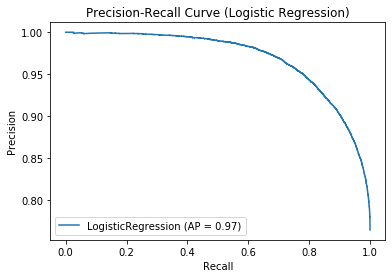

In [44]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(a, x_train_complete, y_train_less50K).ax_.set_title('Precision-Recall Curve (Logistic Regression)')

Text(0.5, 1.0, 'Precision-Recall Curve (SGDC)')

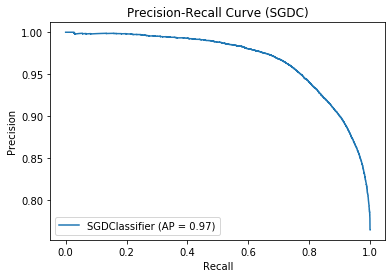

In [45]:
plot_precision_recall_curve(b, x_train_complete, y_train_less50K).ax_.set_title('Precision-Recall Curve (SGDC)')

Text(0.5, 1.0, 'Precision-Recall Curve (Gradient Boosting Classifier)')

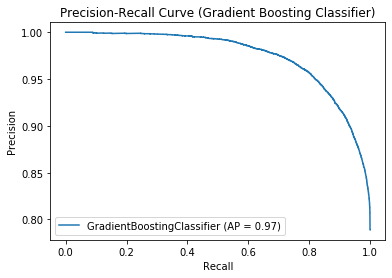

In [46]:
plot_precision_recall_curve(c, x_train_complete, y_train_less50K).ax_.set_title('Precision-Recall Curve (Gradient Boosting Classifier)')

Text(0.5, 1.0, 'Precision-Recall Curve (SVM)')

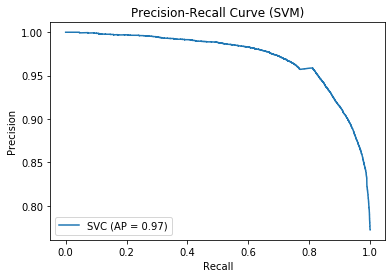

In [47]:
plot_precision_recall_curve(d, x_train_complete, y_train_less50K).ax_.set_title('Precision-Recall Curve (SVM)')

Text(0.5, 1.0, 'Precision-Recall Curve (ADA Boost Classifier)')

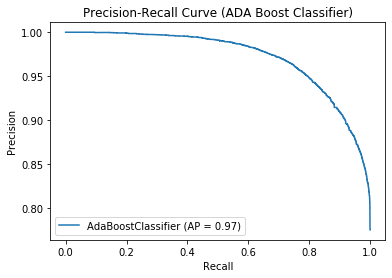

In [48]:
plot_precision_recall_curve(e, x_train_complete, y_train_less50K).ax_.set_title('Precision-Recall Curve (ADA Boost Classifier)')

In [49]:
#extract desired threshold value 

idx = np.argmax(a_precision >= 0.9)
selected_threshold = a_threshold[idx]

print(selected_threshold)
print(a_precision[idx])
print(a_recall[idx])

0.35687239800780857
0.900020116676725
0.9025923808883359


In [50]:
samples = x_train_complete[:200]
samples_label = y_train_less50K[:200]

scores = a.decision_function(samples)
predictions = (scores > selected_threshold)

print('Precision = {:.4f}'.format(precision_score(samples_label, predictions)))
print('Recall = {:.4f}'.format(recall_score(samples_label, predictions)))

Precision = 0.8800
Recall = 0.8919


In [51]:
idx = np.argmax(b_precision >= 0.9)
selected_threshold = b_threshold[idx]

print(selected_threshold)
print(b_precision[idx])
print(b_recall[idx])

0.2788125998570914
0.90000675630025
0.8958004102081302


In [52]:
samples = x_train_complete[:200]
samples_label = y_train_less50K[:200]

scores = b.decision_function(samples)
predictions = (scores > selected_threshold)

print('Precision = {:.4f}'.format(precision_score(samples_label, predictions)))
print('Recall = {:.4f}'.format(recall_score(samples_label, predictions)))

Precision = 0.8544
Recall = 0.9122


In [53]:
idx = np.argmax(c_precision >= 0.9)
selected_threshold = c_threshold[idx]

print(selected_threshold)
print(c_precision[idx])
print(c_recall[idx])

0.30138434772762723
0.9000065184798904
0.9284825661544669


In [54]:
samples = x_train_complete[:200]
samples_label = y_train_less50K[:200]

scores = c.decision_function(samples)
predictions = (scores > selected_threshold)

print('Precision = {:.4f}'.format(precision_score(samples_label, predictions)))
print('Recall = {:.4f}'.format(recall_score(samples_label, predictions)))

Precision = 0.8917
Recall = 0.9459


In [55]:
idx = np.argmax(d_precision >= 0.9)
selected_threshold = d_threshold[idx]

print(selected_threshold)
print(d_precision[idx])
print(d_recall[idx])

0.47539554531902256
0.9000066818121074
0.9057866245250664


In [56]:
samples = x_train_complete[:200]
samples_label = y_train_less50K[:200]

scores = d.decision_function(samples)
predictions = (scores > selected_threshold)

print('Precision = {:.4f}'.format(precision_score(samples_label, predictions)))
print('Recall = {:.4f}'.format(recall_score(samples_label, predictions)))

Precision = 0.9000
Recall = 0.9122


In [57]:
idx = np.argmax(e_precision >= 0.9)
selected_threshold = e_threshold[idx]

print(selected_threshold)
print(e_precision[idx])
print(e_recall[idx])

0.00564132286268902
0.900341591218121
0.9128139605258734


In [58]:
samples = x_train_complete[:200]
samples_label = y_train_less50K[:200]

scores = e.decision_function(samples)
predictions = (scores > selected_threshold)

print('Precision = {:.4f}'.format(precision_score(samples_label, predictions)))
print('Recall = {:.4f}'.format(recall_score(samples_label, predictions)))

Precision = 0.8987
Recall = 0.9595


In [59]:
#plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

a_fpr, a_tpr, a_threshold = roc_curve(y_train_less50K, a_pred_cv)
b_fpr, b_tpr, b_threshold = roc_curve(y_train_less50K, b_pred_cv)
c_fpr, c_tpr, c_threshold = roc_curve(y_train_less50K, c_pred_cv)
d_fpr, d_tpr, d_threshold = roc_curve(y_train_less50K, d_pred_cv)
e_fpr, e_tpr, e_threshold = roc_curve(y_train_less50K, e_pred_cv)

Text(0.5, 1.0, 'ROC Curve (logistic regression)')

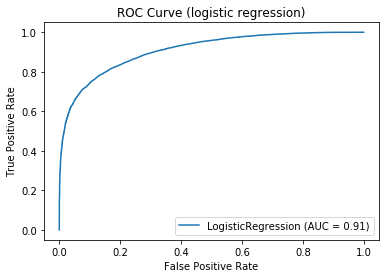

In [60]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(a, x_train_complete, y_train_less50K).ax_.set_title('ROC Curve (logistic regression)')

Text(0.5, 1.0, 'ROC Curve (SGDC)')

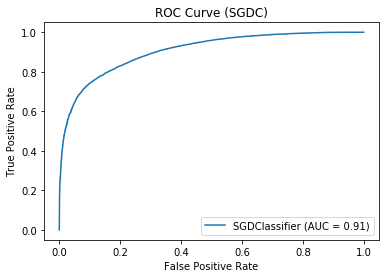

In [61]:
plot_roc_curve(b, x_train_complete, y_train_less50K).ax_.set_title('ROC Curve (SGDC)')

Text(0.5, 1.0, 'ROC Curve (Gradient Boosting Classifier)')

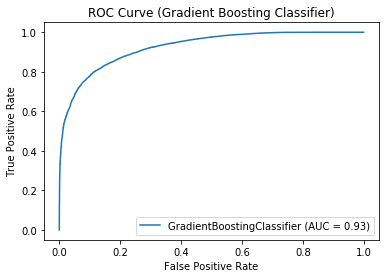

In [62]:
plot_roc_curve(c, x_train_complete, y_train_less50K).ax_.set_title('ROC Curve (Gradient Boosting Classifier)')

Text(0.5, 1.0, 'ROC Curve (SVM)')

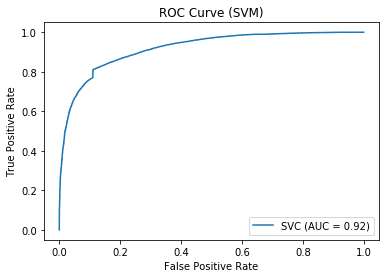

In [63]:
plot_roc_curve(d, x_train_complete, y_train_less50K).ax_.set_title('ROC Curve (SVM)')

Text(0.5, 1.0, 'ROC Curve (ADA Boost Classifier)')

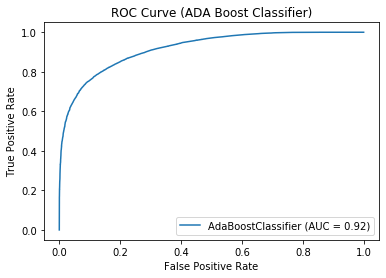

In [64]:
plot_roc_curve(e, x_train_complete, y_train_less50K).ax_.set_title('ROC Curve (ADA Boost Classifier)')

In [65]:
#AUC
print('Logistic Regression (AUC) = {:.3f}'.format(roc_auc_score(y_train_less50K, a_pred_cv)))
print('Stochastic Gradient Descent Classifier (AUC) = {:.3f}'.format(roc_auc_score(y_train_less50K, b_pred_cv)))
print('Gradient Boosting Classifier (AUC) = {:.3f}'.format(roc_auc_score(y_train_less50K, c_pred_cv)))
print('SVM (AUC) = {:.3f}'.format(roc_auc_score(y_train_less50K, d_pred_cv)))
print('ADA Boost Classifier (AUC) = {:.3f}'.format(roc_auc_score(y_train_less50K, e_pred_cv)))

Logistic Regression (AUC) = 0.907
Stochastic Gradient Descent Classifier (AUC) = 0.901
Gradient Boosting Classifier (AUC) = 0.922
SVM (AUC) = 0.901
ADA Boost Classifier (AUC) = 0.915


In [66]:
#Fine tuning
#grid search
from sklearn.model_selection import GridSearchCV


In [67]:
a = LogisticRegression(random_state = 42, max_iter = 2000)
params = {'C' : np.logspace(-4, 4, 20)}
grid = GridSearchCV(a, params, cv=3, scoring="roc_auc")
grid.fit(x_train_complete, y_train_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)


Best hyperparameter settings: {'C': 0.615848211066026}

Score of best model:  0.9068861356462818

Best model:  LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [68]:
b = SGDClassifier(random_state = 42, max_iter = 2000, tol = None)
params = {
    "alpha": [0.001, 0.01, 0.1],
    "loss": ["log", "squared_hinge", "hinge", "modified_huber", "perceptron"],
    "n_jobs": [-1]
}
grid = GridSearchCV(b, params, cv=3, scoring="roc_auc")
grid.fit(x_train_complete, y_train_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)


Best hyperparameter settings: {'alpha': 0.001, 'loss': 'modified_huber', 'n_jobs': -1}

Score of best model:  0.9067053890261819

Best model:  SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=2000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [69]:
c = GradientBoostingClassifier(random_state = 42)
params = {}
grid = GridSearchCV(c, params, cv=3, scoring="roc_auc")
grid.fit(x_train_complete, y_train_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)


Best hyperparameter settings: {}

Score of best model:  0.9216786456679813

Best model:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [70]:
d = svm.SVC(random_state = 42)
params = {}
grid = GridSearchCV(d, params, cv=3, scoring="roc_auc")
grid.fit(x_train_complete, y_train_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)


Best hyperparameter settings: {}

Score of best model:  0.900999117032935

Best model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [71]:
e = AdaBoostClassifier()
params = {}
grid = GridSearchCV(d, params, cv=3, scoring="roc_auc")
grid.fit(x_train_complete, y_train_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)


Best hyperparameter settings: {}

Score of best model:  0.900999117032935

Best model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [72]:
#test data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

x_test_num = x_test.drop(category_col, axis = 1)
x_test_category = x_test[category_col]

print('Shape of X_test_num:', x_test_num.shape)
print('Shape of X_test_cat:', x_test_category.shape)

#x_test_num_tr = imputer.transform(x_test_num)
x_test_num_tr = scaler.transform(x_test_num)
x_test_category_tr = pd.get_dummies(x_test_category)

x_test_complete = np.hstack([x_test_num_tr, x_test_category_tr])

y_test_less50K = (y_test == '<=50K')

Shape of X_test_num: (9769, 6)
Shape of X_test_cat: (9769, 8)


In [73]:
#logistic regression
a_pred = cross_val_predict(a, x_test_complete, y_test_less50K, cv = 3)

a_k_scores = cross_val_score(a, x_test_complete, y_test_less50K, cv = 3, scoring = 'accuracy')

print('Logistic Regression scores: '.ljust(30, ' '), a_k_scores)

print('\nPrecision for logistic regression: ', precision_score(y_test_less50K, a_pred, average='micro'))
print('\nRecall for logistic regression: ', recall_score(y_test_less50K, a_pred, average='micro'))
print('\nF1 for logistic regression: ', f1_score(y_test_less50K, a_pred, average='micro'))

a = LogisticRegression(random_state = 42, max_iter = 2000)
params = {'C' : np.logspace(-4, 4, 20)}
grid = GridSearchCV(a, params, cv=3, scoring="roc_auc")
grid.fit(x_test_complete, y_test_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)

Logistic Regression scores:    [0.84280012 0.85503686 0.8531941 ]

Precision for logistic regression:  0.8503429214863343

Recall for logistic regression:  0.8503429214863343

F1 for logistic regression:  0.8503429214863343

Best hyperparameter settings: {'C': 0.23357214690901212}

Score of best model:  0.9042679929040562

Best model:  LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [74]:
b_pred = cross_val_predict(b, x_test_complete, y_test_less50K, cv = 3)

b_k_scores = cross_val_score(b, x_test_complete, y_test_less50K, cv = 3, scoring = 'accuracy')

print('Logistic Regression scores: '.ljust(30, ' '), b_k_scores)

print('\nPrecision for logistic regression: ', precision_score(y_test_less50K, b_pred, average='micro'))
print('\nRecall for logistic regression: ', recall_score(y_test_less50K, b_pred, average='micro'))
print('\nF1 for logistic regression: ', f1_score(y_test_less50K, b_pred, average='micro'))

b = SGDClassifier(random_state = 42, max_iter = 2000, tol = None)
params = {
    "alpha": [0.001, 0.01, 0.1],
    "loss": ["log", "squared_hinge", "hinge", "modified_huber", "perceptron"],
    "n_jobs": [-1]
}
grid = GridSearchCV(b, params, cv=3, scoring="roc_auc")
grid.fit(x_test_complete, y_test_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)

Logistic Regression scores:    [0.83972981 0.8531941  0.85350123]

Precision for logistic regression:  0.8488074521445389

Recall for logistic regression:  0.8488074521445389

F1 for logistic regression:  0.8488074521445389

Best hyperparameter settings: {'alpha': 0.001, 'loss': 'log', 'n_jobs': -1}

Score of best model:  0.9041856656989665

Best model:  SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=2000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [75]:
c_pred = cross_val_predict(c, x_test_complete, y_test_less50K, cv = 3)

c_k_scores = cross_val_score(c, x_test_complete, y_test_less50K, cv = 3, scoring = 'accuracy')

print('Logistic Regression scores: '.ljust(30, ' '), c_k_scores)

print('\nPrecision for logistic regression: ', precision_score(y_test_less50K, c_pred, average='micro'))
print('\nRecall for logistic regression: ', recall_score(y_test_less50K, c_pred, average='micro'))
print('\nF1 for logistic regression: ', f1_score(y_test_less50K, c_pred, average='micro'))

c = GradientBoostingClassifier(random_state = 42)
params = {}
grid = GridSearchCV(c, params, cv=3, scoring="roc_auc")
grid.fit(x_test_complete, y_test_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)

Logistic Regression scores:    [0.84986184 0.870086   0.86547912]

Precision for logistic regression:  0.8618077592384072

Recall for logistic regression:  0.8618077592384072

F1 for logistic regression:  0.8618077592384072

Best hyperparameter settings: {}

Score of best model:  0.9135460620991586

Best model:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_star

In [76]:
d_pred = cross_val_predict(d, x_test_complete, y_test_less50K, cv = 3)

d_k_scores = cross_val_score(d, x_test_complete, y_test_less50K, cv = 3, scoring = 'accuracy')

print('Logistic Regression scores: '.ljust(30, ' '), d_k_scores)

print('\nPrecision for logistic regression: ', precision_score(y_test_less50K, d_pred, average='micro'))
print('\nRecall for logistic regression: ', recall_score(y_test_less50K, d_pred, average='micro'))
print('\nF1 for logistic regression: ', f1_score(y_test_less50K, d_pred, average='micro'))

d = svm.SVC(random_state = 42)
params = {}
grid = GridSearchCV(d, params, cv=3, scoring="roc_auc")
grid.fit(x_test_complete, y_test_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)

Logistic Regression scores:    [0.84894074 0.85687961 0.85288698]

Precision for logistic regression:  0.8529020370559934

Recall for logistic regression:  0.8529020370559934

F1 for logistic regression:  0.8529020370559934

Best hyperparameter settings: {}

Score of best model:  0.8961226762508673

Best model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [78]:
e_pred = cross_val_predict(e, x_test_complete, y_test_less50K, cv = 3)

e_k_scores = cross_val_score(e, x_test_complete, y_test_less50K, cv = 3, scoring = 'accuracy')

print('Logistic Regression scores: '.ljust(30, ' '), e_k_scores)

print('\nPrecision for logistic regression: ', precision_score(y_test_less50K, e_pred, average='micro'))
print('\nRecall for logistic regression: ', recall_score(y_test_less50K, e_pred, average='micro'))
print('\nF1 for logistic regression: ', f1_score(y_test_less50K, e_pred, average='micro'))

e = AdaBoostClassifier()
params = {}
grid = GridSearchCV(e, params, cv=3, scoring="roc_auc")
grid.fit(x_test_complete, y_test_less50K)
print('\nBest hyperparameter settings:', grid.best_params_)
print('\nScore of best model: ', grid.best_score_)
print('\nBest model: ', grid.best_estimator_)


Logistic Regression scores:    [0.8455634  0.86210074 0.86210074]

Precision for logistic regression:  0.8565871634763026

Recall for logistic regression:  0.8565871634763026

F1 for logistic regression:  0.8565871634763026

Best hyperparameter settings: {}

Score of best model:  0.9082894949445505

Best model:  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
